<a href="https://colab.research.google.com/github/Apricold/Walmart_Analysis_Dataset/blob/main/walmart_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Exploration

In [45]:
#importing libraries to treat data
import pandas as pd
import numpy as np
#importing libraries to plot data
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from fitter import Fitter
!pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
#Importing the dataset and reading dates properly
df=pd.read_csv('Walmart.csv',  parse_dates=['Date'])
df=df.reindex(sorted(df.columns), axis=1)
df.head()

<ipython-input-46-581553df790f>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df=pd.read_csv('Walmart.csv',  parse_dates=['Date'])


,CPI,Date,Fuel_Price,Holiday_Flag,Store,Temperature,Unemployment,Weekly_Sales
0,211.096358,2010-05-02,2.572,0,1,42.31,8.106,1643690.90
1,211.242170,2010-12-02,2.548,1,1,38.51,8.106,1641957.44
2,211.289143,2010-02-19,2.514,0,1,39.93,8.106,1611968.17
3,211.319643,2010-02-26,2.561,0,1,46.63,8.106,1409727.59
4,211.350143,2010-05-03,2.625,0,1,46.50,8.106,1554806.68


Explication of the variables

*   Store:The store number
*   Date:The week of sales





In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CPI           6435 non-null   float64       
 1   Date          6435 non-null   datetime64[ns]
 2   Fuel_Price    6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Store         6435 non-null   int64         
 5   Temperature   6435 non-null   float64       
 6   Unemployment  6435 non-null   float64       
 7   Weekly_Sales  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


*Our data starts from May of 2010 and ends in October of 2012*

In [48]:
df.Date.head(1).append(df.Date.tail(1))

<ipython-input-48-8c52feb70ed5>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.Date.head(1).append(df.Date.tail(1))


0      2010-05-02
6434   2012-10-26
Name: Date, dtype: datetime64[ns]

*We can see that our dataset have 6435 entries also there are not nan values*

In [49]:
#We check if theres any nan values in the dataframe
df.isna().values.any()

False

*Let's see the descriptive statistics of our features*


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06


In [51]:
#CHECKING UNIQUE VALUES IN EACH COLUMN
df.nunique().sort_values()

Holiday_Flag       2
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

#*Explority Data Analysis* (EDA)#

*Now we plot our target variable week sales over time*

(array([14610., 14730., 14853., 14975., 15095., 15218., 15340., 15461.,
        15584., 15706.]),
 [Text(14610.0, 0, '2010-01'),
  Text(14730.0, 0, '2010-05'),
  Text(14853.0, 0, '2010-09'),
  Text(14975.0, 0, '2011-01'),
  Text(15095.0, 0, '2011-05'),
  Text(15218.0, 0, '2011-09'),
  Text(15340.0, 0, '2012-01'),
  Text(15461.0, 0, '2012-05'),
  Text(15584.0, 0, '2012-09'),
  Text(15706.0, 0, '2013-01')])

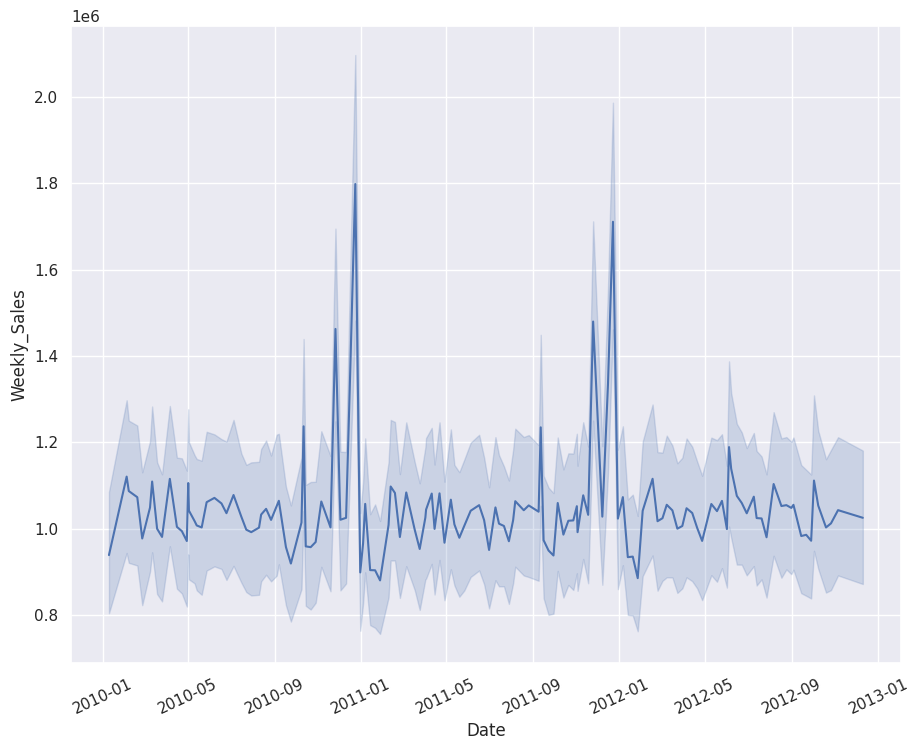

In [52]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
sns.lineplot(x = "Date", y = "Weekly_Sales",
             data = df)
plt.xticks(rotation = 25)

*we can definitely identify there are two peaks  in the whole dataset one of these is after Sepctember(09) until january(01) between 2010 and 2011 and the other one is there's also after Sepctember(09) until january(01) between 2011 and 2012 where is  a huge increment in sales,lets identify which months sales are the highest*

<ipython-input-53-84fbe842eb69>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Weekly_Sales, color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)


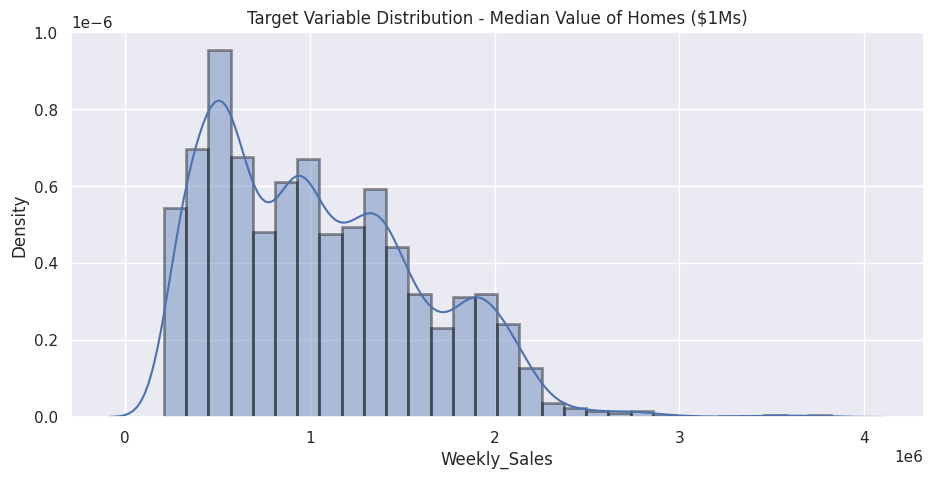

In [53]:
plt.figure(figsize=[11,5])
sns.distplot(df.Weekly_Sales, color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

*let's find the distribution of our target variable using fitter module the summary method provides a list of the best performing models ascendingly with respect to the  sum of squares error*

Fitting 5 distributions: 100%|██████████| 5/5 [00:01<00:00,  4.72it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,1.060105e-12,3304.974362,-233826.723767,inf,0.035035,2.682577e-07
gamma,1.366281e-12,3206.657881,-232202.775467,inf,0.056468,2.820510e-18
norm,2.614065e-12,3471.056853,-228036.426203,inf,0.082358,2.038638e-38
uniform,8.366655e-12,3023.771642,-220550.284781,inf,0.442106,0.000000e+00
lognorm,1.479443e-11,3634.729145,-216873.588482,inf,0.777526,0.000000e+00


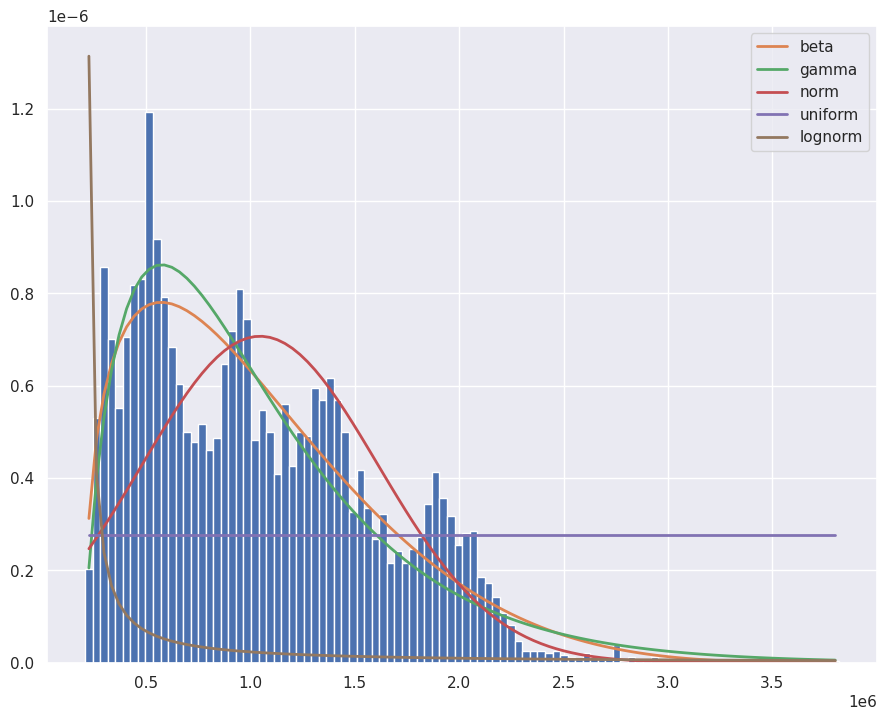

In [54]:
dist_fitter = Fitter(df.Weekly_Sales,
                     distributions = ["uniform",
                                      "beta",
                                      "gamma",
                                      "lognorm",
                                      "norm",])

dist_fitter.fit()
dist_fitter.summary()      

*let's find now the parameters in this case the mean and the variance with which beta distribution fits our data*

In [55]:
mean,var,kuw,ske=dist_fitter.fitted_param["beta"]
print(f'the mean of the Weekly sales probability distribution is: {mean}\nthe var of the Weekly sales probabily distribution is: {var} ')

the mean of the Weekly sales probability distribution is: 1.440413205448582
the var of the Weekly sales probabily distribution is: 5.257967904441347 


<Figure size 1070x827 with 0 Axes>

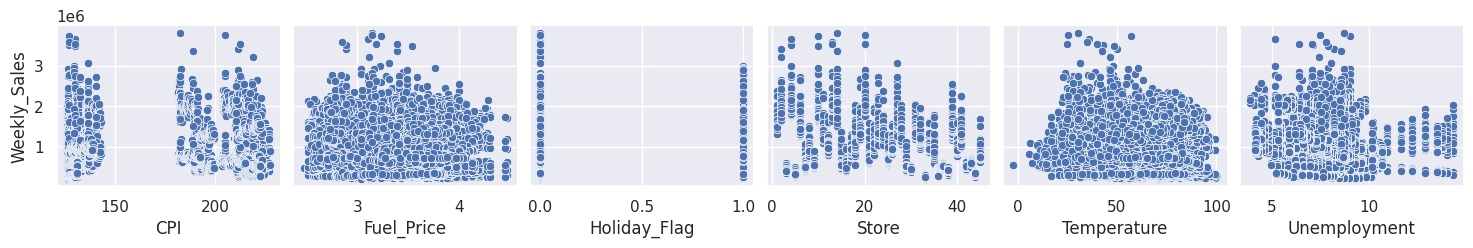

In [66]:
plt.figure()
cols_to_plot = df.loc[:, df.columns != 'Date']
cols_to_plot=cols_to_plot.columns[:-1] # explicitly add the column "Outcome" to your list of columns to plot
sns.pairplot(df,x_vars=cols_to_plot,y_vars='Weekly_Sales')
plt.show()
